# Import Library

In [1]:
# Mengimpor pandas untuk manipulasi data
import pandas as pd

# Mengimpor Numpy untuk perhitungan
import numpy as np

# Mengimpor statsmodel untuk metode-metode statistik
# untuk pengujian, dalam kasus ini uji proporsi menggunakan stats.proportion
import statsmodels.stats.proportion as sp

# Mengimpor matplotlib dan seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# AB Testing / Experimental Design

## Import Dataset

In [2]:
# Import dataset csv
df_abtest = pd.read_csv('ab_data.csv')

In [3]:
df_abtest

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


## Separate Control and Treatment Dataset

In [4]:
# Kita pisahkan antara group control dengan group treatment
control = df_abtest[df_abtest['group'] == 'control']
treatment = df_abtest[df_abtest['group'] == 'treatment']

## Calculate Number of Success and Number of Observation

In [5]:
# Kita hitung berapa kesuksesan atau convertednya 1 di data control 
n_success_control = control['converted'].sum()

# Kita hitung berapa kesuksesan atau convertednya 1 di data treatment
n_success_treatment = treatment['converted'].sum()

# Jumlah user yang masuk ke group control
n_obs_control = control['converted'].count()

# Jumlah user yang masuk ke group treatment
n_obs_treatment = treatment['converted'].count()

In [6]:
# Kesuksesan atau convertednya 1 di data control
n_success_control

17723

In [7]:
# kesuksesan atau convertednya 1 di data treatment
n_success_treatment

17514

In [8]:
# Jumlah user yang masuk ke group control
n_obs_control

147202

In [9]:
# Jumlah user yang masuk ke group treatment
n_obs_treatment

147276

## Calculate Descriptive Statistics

In [10]:
# Menghitung conversion rate dari masing-masing group
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment

In [11]:
# Cara Pertama
# Memeriksa berapa persen conversion rate
# {0:0.4f} agar hasilnya 4 angka dibelakang koma
#  {0:0.4f}'.format(control_conversion_rate): cara untuk menambahkan sesuatu di variabel string
print('Conversion Rate from Control : {0:0.4f}'.format(control_conversion_rate))
print('Conversion Rate from Treatment : {0:0.4f}'.format(treatment_conversion_rate))
# karena sample maka selanjutnya dilakukan uji hipotesis

Conversion Rate from Control : 0.1204
Conversion Rate from Treatment : 0.1189


In [12]:
# Cara Kedua
print(f'Conversion Rate from Control : {control_conversion_rate}')
print(f'Conversion Rate from Treatment : {treatment_conversion_rate}')

Conversion Rate from Control : 0.12039917935897611
Conversion Rate from Treatment : 0.11891957956489856


Berdasarkan hasil dapat diketahui bahwa conversion rate pada control (old page) sebesar 12,04%. Sedangkan conversion rate pada treatment (new page) sebesar 11,89%. Langkah selanjutnya melakukan uji statistika inferensial

(0.118, 0.1205)

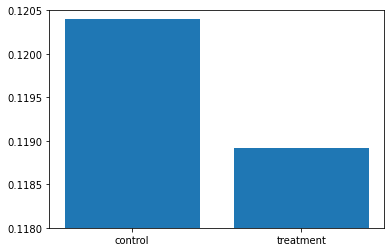

In [13]:
x = ['control','treatment'] # sumbu x
value = [control_conversion_rate,treatment_conversion_rate] # sumbu y
plt.bar(x,value)

plt.ylim(0.118,0.1205) # limit untuk membatasi interval

***is the difference significance?*** <br>

## Do Hypothesis Testing

Hipotesis 2 sisi

H0: existing design and new design **have same** conversion rate <br>

H1: existing design and new design **do not have same** conversion rate

Hipotesis 1 sisi


H0: conversion rate new design <= conversion rate existing design (new tidak lebih baik dari old)

H1: conversion rate new design > conversion rate existing design (new lebih baik dari old)

Kasus ini kita menggunakan 1 sisi

Alasan menggunakan uji proporsi karena dalam kasus ini kita ingin mengetahui berapa besar peluang conversion rate di page baru dan page lama

In [14]:
# Membuat array dari n_success dan n_obs sebelum melakukan uji proporsi
success = np.array([n_success_control, n_success_treatment])
obs = np.array([n_obs_control, n_obs_treatment])

In [15]:
success

array([17723, 17514], dtype=int64)

In [16]:
obs

array([147202, 147276])

In [17]:
# Melakukan uji proporsi
stats, pvalue = sp.proportions_ztest(success, obs)

In [18]:
# Melihat uji statistik
stats

1.2369217547321678

In [19]:
# Melihat p value
pvalue

0.21611613269757501

In [20]:
# Melakukan uji hipotesi
print('P-Value : '+ str(pvalue))
if pvalue >= 0.05:
    print('Menolak H1')
else :
    print('Menolak H0')

P-Value : 0.21611613269757501
Menolak H1


Berdasarkan pengujian statistik, diketahui bahwa P-value >= 0.05 maka H0 gagal ditolak. Artinya conversion rate untuk new design tidak lebih baik dari old design.